In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

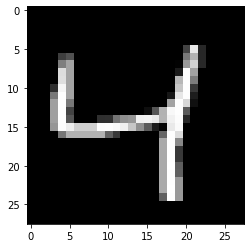

In [4]:
plt.imshow(x_train[2], cmap='gray')

plt.show()

In [24]:
def digit_to_canvas(img):
    rnd_row = np.random.randint(0, 100)
    rnd_col = np.random.randint(0, 100)
    canv = np.zeros((128, 128))
    canv[rnd_row:rnd_row + 28, rnd_col:rnd_col + 28] = img
    return canv, (rnd_col, rnd_row)

def create_dataset(data, start_ind, end_ind):
    new_dataset = []
    labels = []
    for i in range(start_ind, end_ind):
        x_new, label = digit_to_canvas(data[i])
        new_dataset.append(x_new)
        labels.append(label)
    return np.array(new_dataset), labels

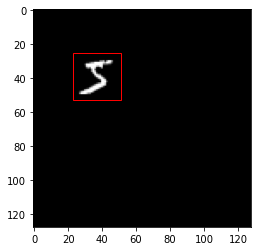

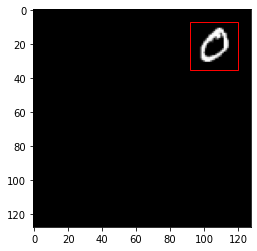

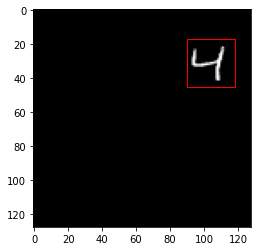

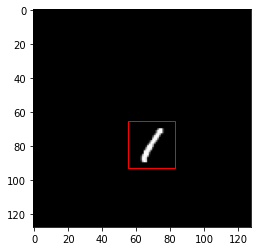

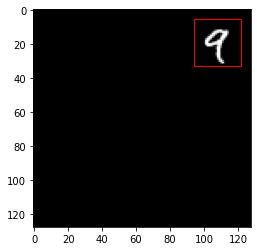

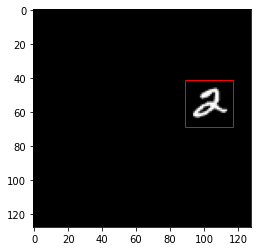

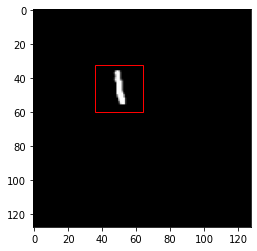

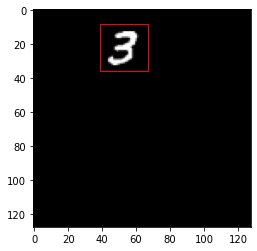

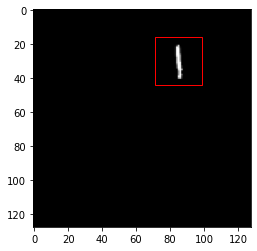

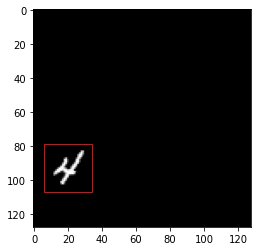

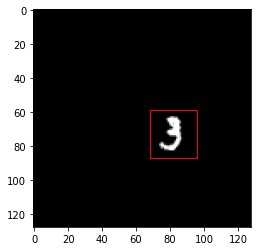

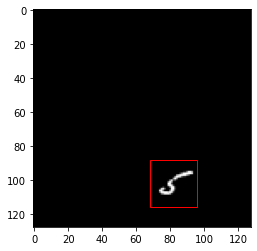

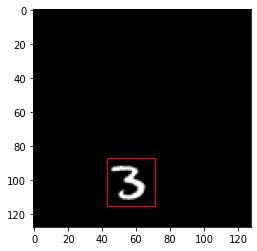

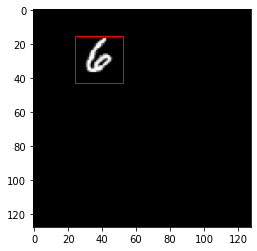

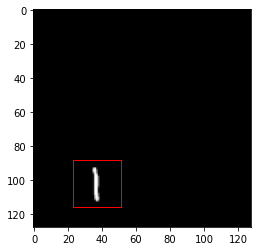

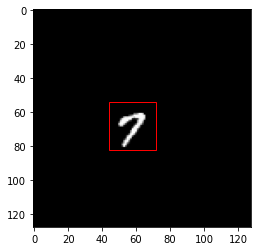

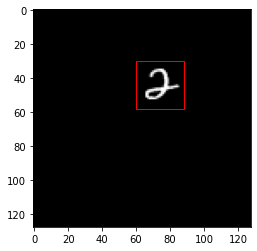

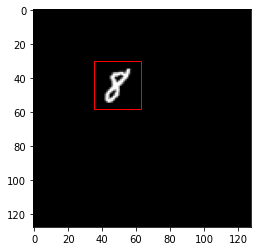

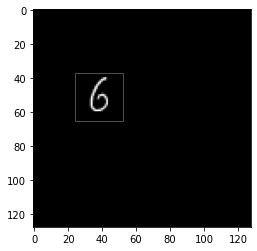

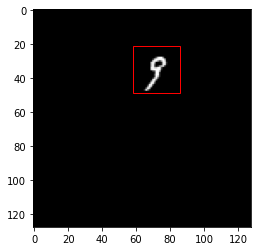

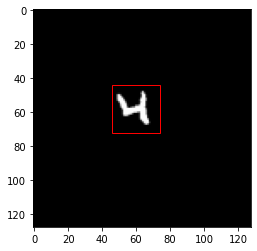

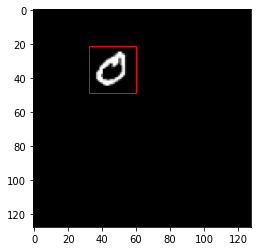

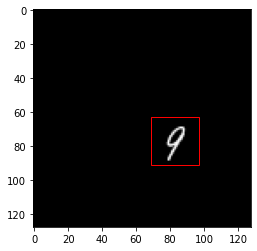

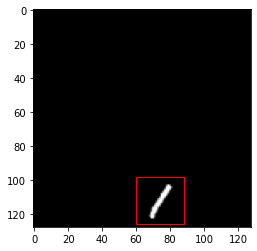

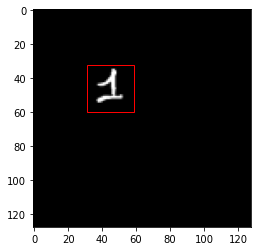

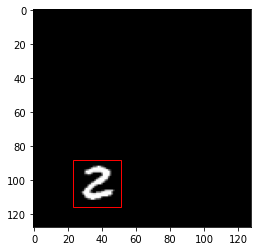

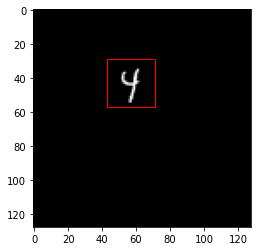

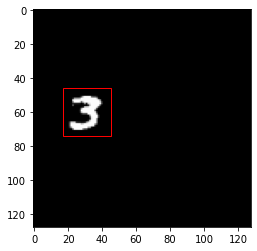

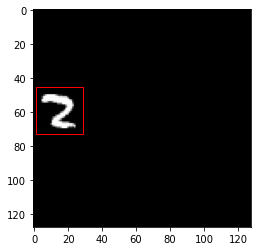

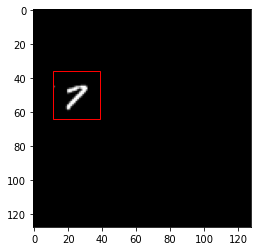

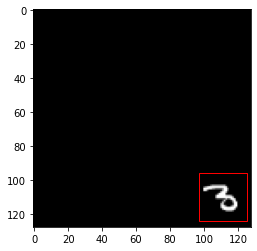

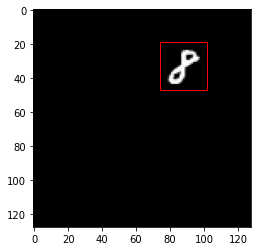

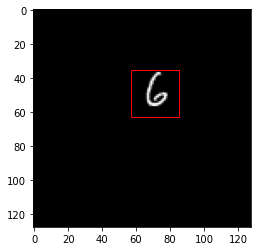

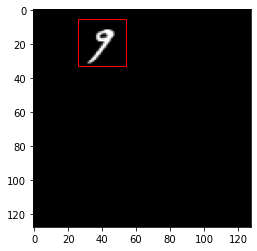

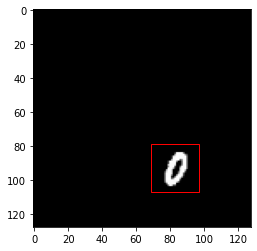

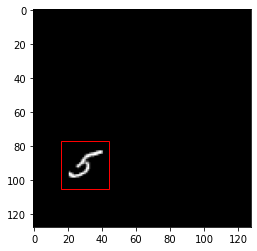

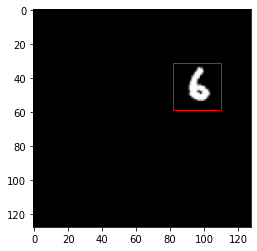

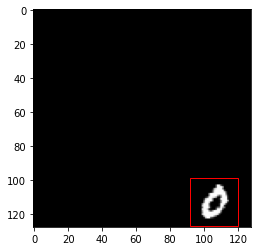

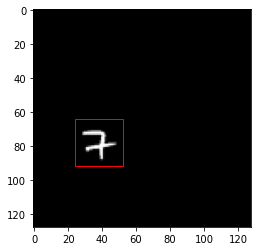

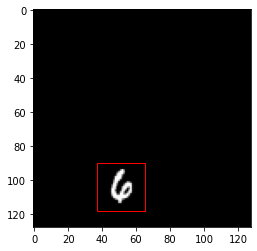

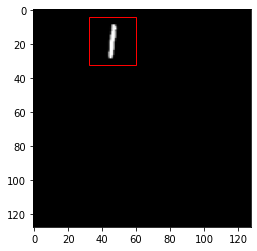

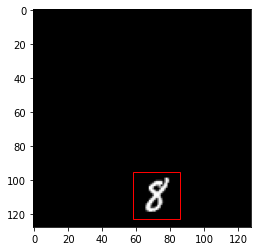

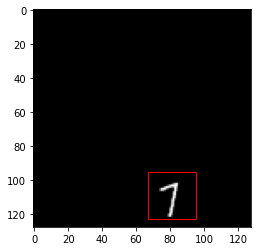

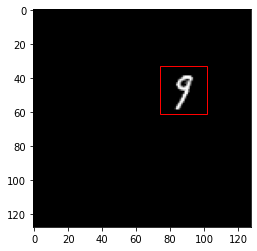

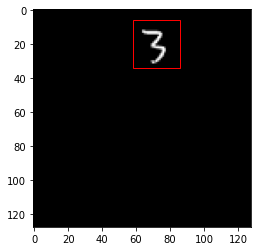

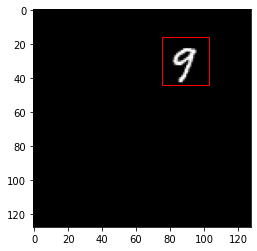

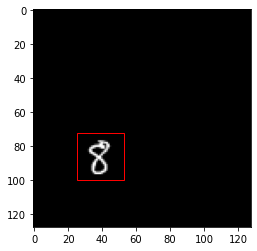

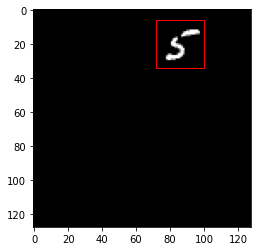

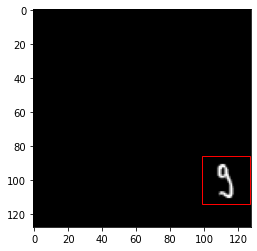

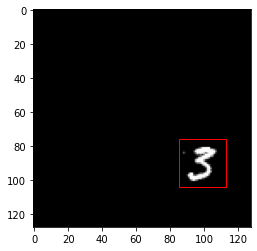

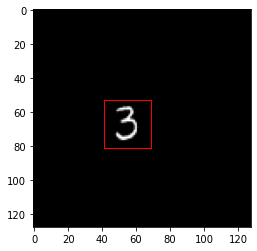

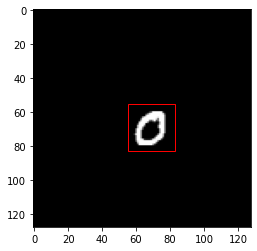

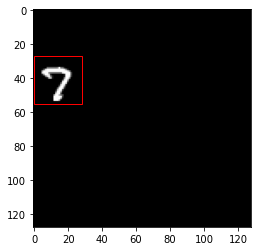

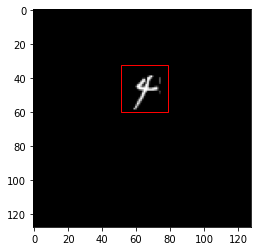

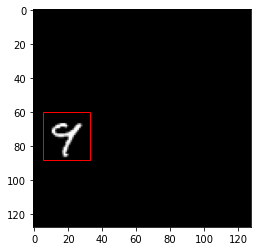

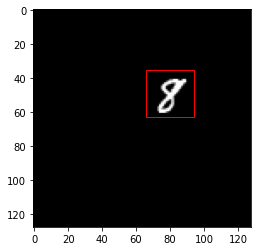

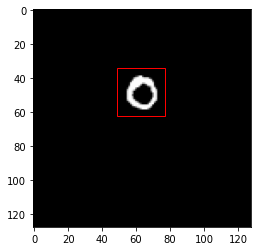

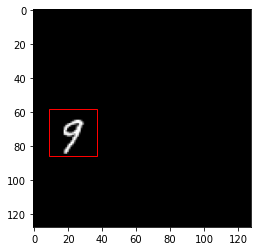

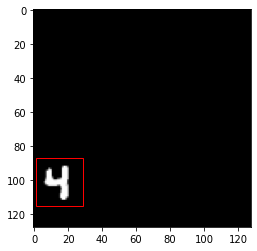

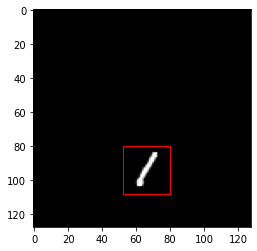

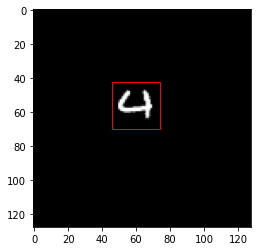

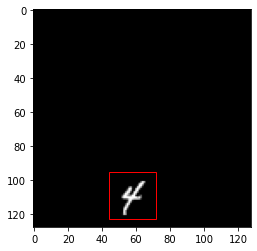

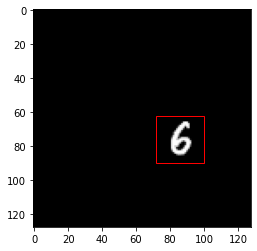

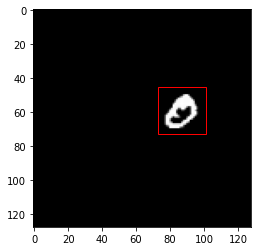

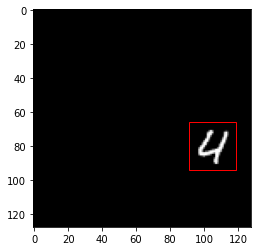

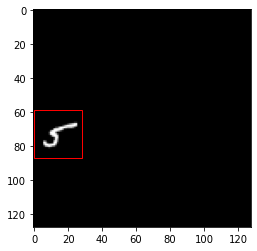

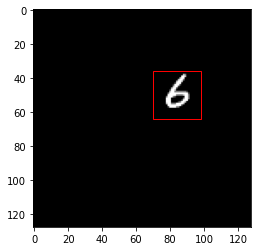

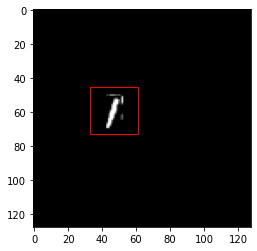

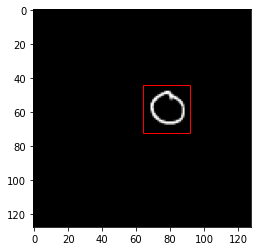

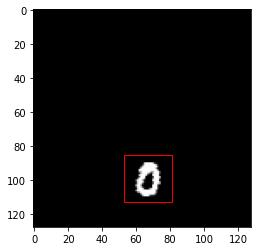

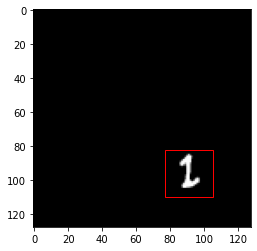

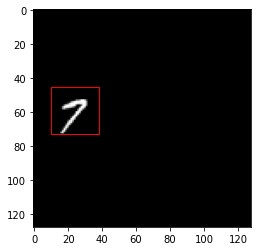

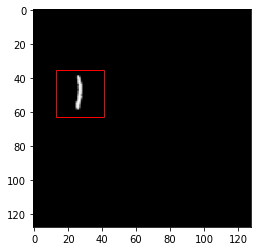

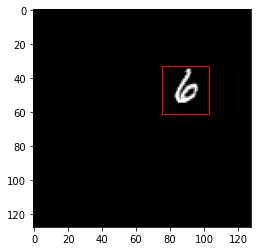

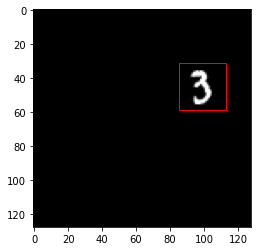

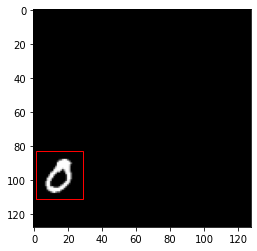

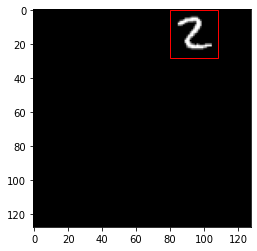

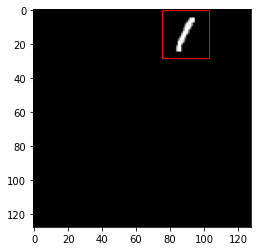

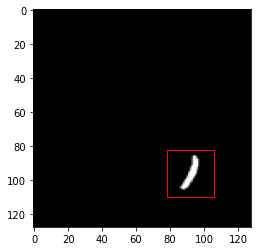

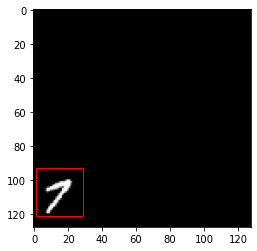

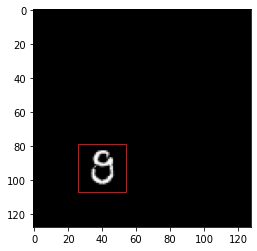

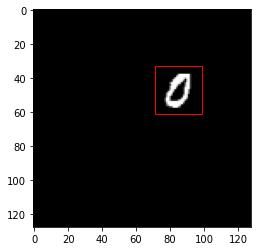

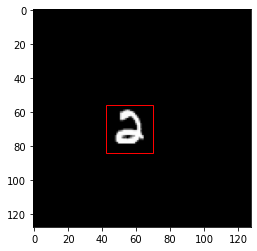

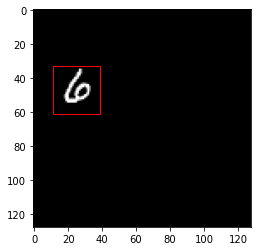

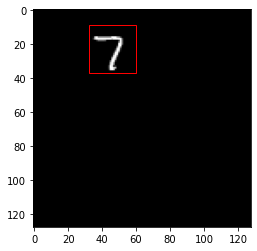

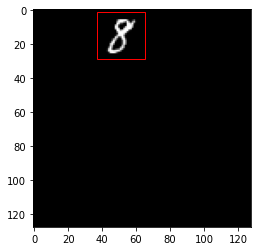

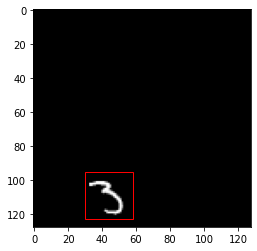

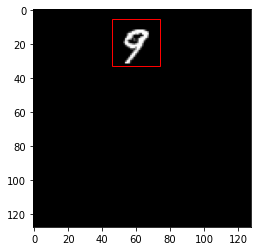

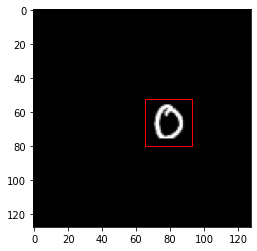

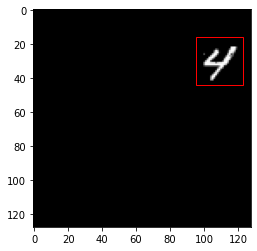

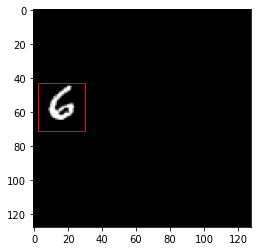

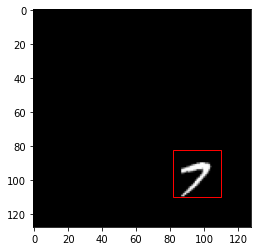

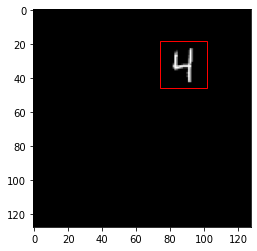

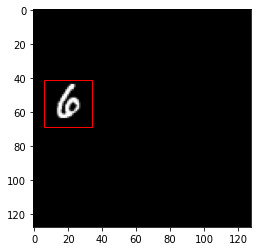

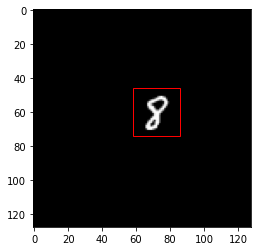

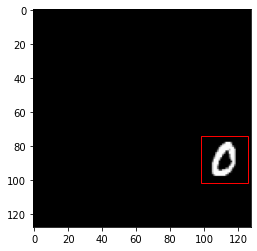

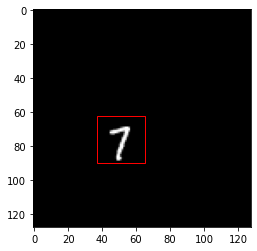

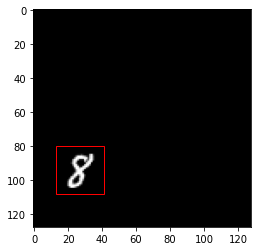

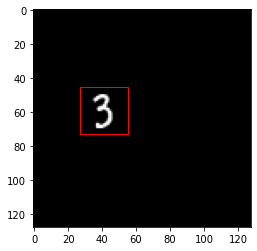

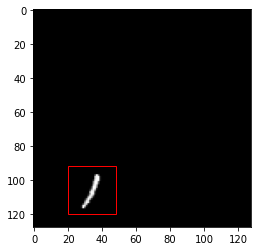

In [25]:
x_new, labels = create_dataset(x_train, 0, 100)


In [ ]:

for i in range(100):
    plt.imshow(x_new[i], cmap='gray')

    rect = Rectangle(labels[i], 28, 28, linewidth=1, edgecolor='red', facecolor='none')
    plt.gca().add_patch(rect)

    
    plt.show()